# Logistic Regression練習 + Square Error
選擇不適當的cost，gradient會卡住http://speech.ee.ntu.edu.tw/~tlkagk/courses/ML_2016/Lecture/Logistic%20Regression%20(v3).pdf#page=15

In [81]:
%pylab inline
import theano
import theano.tensor as T
import itertools as it

Populating the interactive namespace from numpy and matplotlib


In [82]:
def floatX(X):
    return np.asarray(X, dtype=theano.config.floatX)

## make batches

In [83]:
### make batches
def mk_batches(x_data, y_data, batch_size, shuffle=False):
    x_batch = list()
    y_batch = list()
    
    x_data_size = x_data.shape[0]
    y_data_size = y_data.shape[0]
    assert x_data_size == y_data_size , 'the x, y dimension is error'
    
    if shuffle:
        indices = np.arange(x_data_size)
        np.random.shuffle(indices)
    
    #range(start, stop, step)
    for start_idx in range(0, x_data_size, batch_size):
        if shuffle:
            idx = indices[start_idx : start_idx + batch_size]            
        else:
            idx = slice(start_idx, start_idx + batch_size)
            
        x_batch.append(x_data[idx])
        y_batch.append(y_data[idx])
    
    return x_batch, y_batch

## 參數調整

In [84]:
BATCH_SIZE = 10
LEARNING_RATE = 0.001
EPOCHS = 1000

## Load Data

In [85]:
batch_size = BATCH_SIZE
x_data = floatX(np.loadtxt('.\ex4x.dat'))
y_data = floatX(np.loadtxt('.\ex4y.dat'))

## 初始化權重

In [86]:
### params / init weights
w = theano.shared(floatX(np.random.randn(2))) #有兩個x就要搭配兩個w
b = theano.shared(floatX(np.random.randn(1))[0])

# Model

In [87]:
x = T.matrix()
z = T.dot(w, x.T) + b
y = 1 / (1 + T.exp(-1 * z))
f = theano.function([x], y)

# Cost (<span style='color:red'>Square Error</span>)

In [88]:
y_hat = T.vector()
cost = T.mean((y-y_hat)**2)

## gradient

In [89]:
### gradients
def gd(params, grads, lr):
    updates = []
    for p, g in it.izip(params, grads):      
        updates.append([p, p - lr*g])
    return updates
    
dw, db = T.grad(cost, [w, b])
train = theano.function(inputs=[x, y_hat],
                        outputs=[cost, w, b],
                        updates=gd([w, b], [dw, db], LEARNING_RATE))

## training

In [90]:
# training
def training(epochs, x_data, y_data):
    costs = []
    for t in range(epochs): 
        all_cost = 0       
        x_batches, y_batches = mk_batches(x_data, y_data, BATCH_SIZE, True)        
        batch_num = len(x_batches)
        for i in range(batch_num):        
            results = train(x_batches[i], y_batches[i])            
            all_cost += results[0]
        
        costs.append(all_cost/batch_num)
    
    print 'avg cost=%f' % (costs[-1])        
    print 'w1=%f, w2=%f, b=%f' % (results[1][0], results[1][1], results[2])

    return costs, results

costs, results = training(EPOCHS, x_data, y_data)

avg cost=0.500000
w1=0.237423, w2=0.306913, b=-2.436066


## cost chart (一直線)

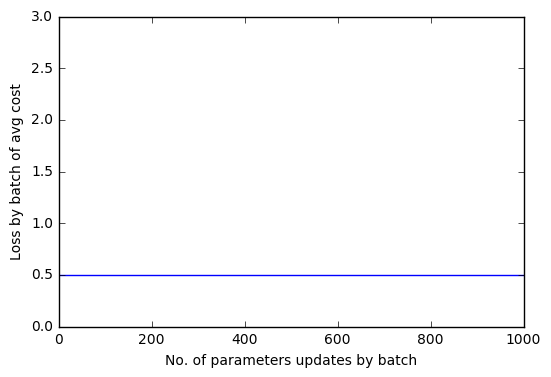

In [91]:
# cost chart
def plot_cost(costs):
    plt.plot(costs)
    plt.ylim([0, 3.0])
    plt.xlabel("No. of parameters updates by batch")
    plt.ylabel("Loss by batch of avg cost")
    plt.show()
    
plot_cost(costs)